In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
df_train = pd.read_csv("houses_to_rent_train.csv")
df_val = pd.read_csv("houses_to_rent_val.csv")
df_test = pd.read_csv("houses_to_rent_test.csv")

In [4]:
df_train_dum = pd.get_dummies(df_train)
df_val_dum = pd.get_dummies(df_val)
df_test_dum = pd.get_dummies(df_test)

In [5]:
X_train = df_train_dum.drop('rent',axis=1)
X_val = df_val_dum.drop('rent',axis=1)
X_test = df_test_dum.drop('rent',axis=1)
y_train = df_train_dum['rent'].values
y_val = df_val_dum['rent'].values
y_test = df_test_dum['rent'].values

Linear regression

In [8]:
LRegression = LinearRegression()
LRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_val_pred_LReg = LRegression.predict(X_val)
mea_LReg_val = mean_absolute_error(y_val,y_val_pred_LReg)
print("mean absolute error(Validation Set) for Linear Regression: $",mea_LReg_val)

mean absolute error(Validation Set) for Linear Regression: $ 232.45932174371683


Lasso Regression

In [10]:
LassoRegression = Lasso(normalize=True)
LassoRegression.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [11]:
y_val_pred_LassoReg = LassoRegression.predict(X_val)
mea_LassoReg_val = mean_absolute_error(y_val,y_val_pred_LassoReg)
print("mean absolute error(Validation Set) for Base Lasso Regression: $",mea_LassoReg_val)

mean absolute error(Validation Set) for Base Lasso Regression: $ 287.8514478552928


In [12]:
LsR_alpha = []
LsR_error = []
alpha_values = np.linspace(3.9,4.0,1000)
for alpha in alpha_values:
    print(alpha)
    LsR_alpha.append(alpha)
    LassoRegression = Lasso(alpha=alpha/100,normalize=True)
    LassoRegression.fit(X_train,y_train)
    y_val_pred_LassoReg = LassoRegression.predict(X_val)
    LsR_error.append(mean_absolute_error(y_val,y_val_pred_LassoReg))
clear_output()

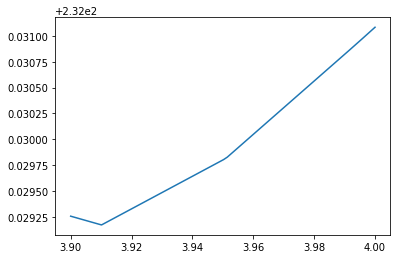

In [13]:
plt.plot(LsR_alpha,LsR_error)

In [14]:
LsR_ErrorTable = []
for i in range(len(LsR_alpha)):
    LsR_err_Log = dict()
    LsR_err_Log['LsR_alpha'] = LsR_alpha[i]
    LsR_err_Log['LsR_error'] = LsR_error[i]
    LsR_ErrorTable.append(LsR_err_Log)

In [15]:
df_LsR_ErrTB = pd.DataFrame(LsR_ErrorTable)

In [16]:
df_LsR_ErrTB[df_LsR_ErrTB.LsR_error == df_LsR_ErrTB.LsR_error.min()]

,LsR_alpha,LsR_error
101,3.91011,232.029173


Random Forest Regressor

In [ ]:
RfRegressor = RandomForestRegressor(criterion="mae")
RfRegressor.fit(X_train,y_train)

In [7]:
y_val_pred_RfReg = RfRegressor.predict(X_val)
mea_RfReg_val = mean_absolute_error(y_val,y_val_pred_RfReg)
print("mean absolute error(Validation Set) for Base Random Forest Regression: $",mea_RfReg_val)

mean absolute error(Validation Set) for Base Random Forest Regression: $ 67.79030125195618


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Test Data set

In [17]:
#Best Model
LassoRegression = Lasso(alpha=3.91011,normalize=True)
LassoRegression.fit(X_train,y_train)

Lasso(alpha=3.91011, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_test_pred_LReg = LRegression.predict(X_test)
y_test_pred_LassoReg = LassoRegression.predict(X_test)
y_test_pred_RfReg = RfRegressor.predict(X_test)

In [19]:
mea_LReg_test = mean_absolute_error(y_test,y_test_pred_LReg)
mea_LassoReg_test = mean_absolute_error(y_test,y_test_pred_LReg)
mea_RfReg_test = mean_absolute_error(y_test,y_test_pred_RfReg)

In [20]:
print("mean absolute error(Test Set) for base Linear Regression: $",mea_LReg_test)
print("mean absolute error(Test Set) for Best Lasso Regression: $",mea_LassoReg_test)
print("mean absolute error(Test Set) for base Random Forest Regression: $",mea_RfReg_test)

mean absolute error(Test Set) for base Linear Regression: $ 240.49317779314038
mean absolute error(Test Set) for Best Lasso Regression: $ 240.49317779314038
mean absolute error(Test Set) for base Random Forest Regression: $ 67.75340492957746
